# Logistic Regression

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [7]:
print(classifier.predict([X_test[0]]))

[0]


## Predict the Test set results

In [8]:
y_pred = classifier.predict(X_test)
y_test_pred = np.c_[y_test, y_pred]

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acs = accuracy_score(y_test, y_pred) 
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acs * 100}%")


Confusion Matrix:
 [[65  3]
 [ 8 24]]
Accuracy: 89.0%


## Visualizing the Training set results

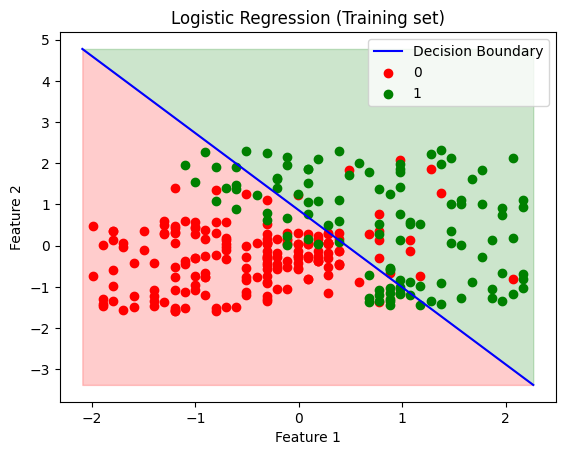

In [11]:
from matplotlib.colors import ListedColormap

w = classifier.coef_
b = classifier.intercept_

w = w.reshape(-1)

# Calculates the decision boundary: x1 = (-b - w[0] * x0) / w[1]
x0 = np.linspace(start=min(X_train[:, 0] - 0.1), stop=max(X_train[:, 0] + 0.1), num=400)
x1 = (-b[0] - w[0] * x0) / w[1]


plt.plot(x0, x1, c="b", label="Decision Boundary")


plt.fill_between(x0, x1, min(x1), where=(x1 >= min(x1)), color="red", alpha=0.2)
plt.fill_between(x0, x1, max(x1), where=(x1 <= max(x1)), color="green", alpha=0.2)


for i, j in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train[y_train == j, 0],
        X_train[y_train == j, 1],
        color=ListedColormap(("red", "green"))(i),
        label=j,
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression (Training set)")
plt.legend()
plt.show()

/tmp/ipykernel_78358/2926997273.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


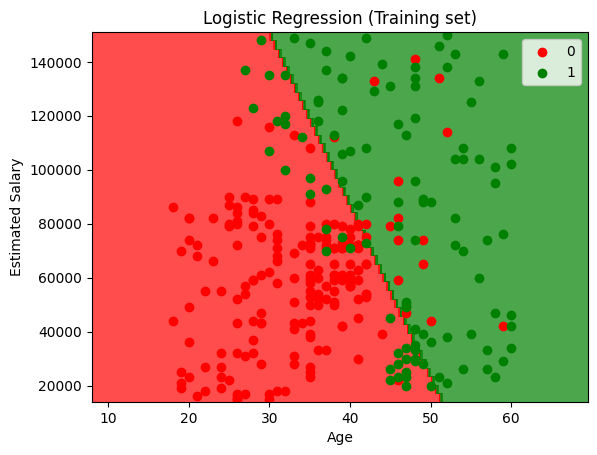

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
        X1.shape
    ),
    alpha=0.7,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        color=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Logistic Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

## Visualizing the Test set results

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
        X1.shape
    ),
    alpha=0.7,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        color=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Logistic Regression (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()